In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express

In [2]:
df = pd.read_csv("../../data/02/features_3sec-1sec/3-1_train_df.csv", index_col=0)
print(df.shape)
df.head(2)

(19595, 66)


bandwidth_mean  bandwidth_var  cen10_mean  cen10_var  cen11_mean  \
0     2298.260261   67384.407091    0.327071   0.016863     0.36007   
1     2306.647318   60519.766309    0.368515   0.006897     0.37544   

   cen11_var  cen12_mean  cen12_var  cen1_mean  cen1_var  ...  stft6_mean  \
0   0.007993    0.193739   0.003825   0.260094  0.004618  ...    0.189020   
1   0.005091    0.188899   0.002577   0.263474  0.005116  ...    0.194217   

   stft6_var  stft7_mean  stft7_var  stft8_mean  stft8_var  stft9_mean  \
0   0.046473    0.255575   0.053567    0.350054   0.096253    0.259476   
1   0.046266    0.251588   0.056155    0.319723   0.054750    0.380776   

   stft9_var       tempo  zero_crossings  
0   0.052308  151.999081          4506.0  
1   0.083758  151.999081          4223.0  

[2 rows x 66 columns]

In [3]:
df_grouped = df.groupby(by="genre").mean()
df_grouped

bandwidth_mean  bandwidth_var  cen10_mean  cen10_var  cen11_mean  \
genre                                                                         
blues         1942.016885   95863.753016    0.246719   0.011214    0.254224   
classical     1530.847030   45735.450375    0.219594   0.015530    0.200950   
country       2074.644808  120998.508733    0.278117   0.013081    0.197153   
disco         2502.056222  121454.326602    0.267808   0.005330    0.246140   
hiphop        2560.047516  153698.941754    0.292651   0.006066    0.258911   
jazz          2007.707668   85954.515031    0.244010   0.014135    0.248116   
metal         2238.843792   57408.609963    0.292946   0.005146    0.255939   
pop           3028.256115  151227.287789    0.254300   0.007818    0.244387   
reggae        2266.621240  212607.580321    0.265688   0.011683    0.239690   
rock          2284.792803  116968.345151    0.290282   0.008734    0.225172   

           cen11_var  cen12_mean  cen12_var  cen1_mean  cen1_var  ...  \
genre                                                             ...   
blues       0.010978    0.258450   0.008959   0.257705  0.010410  ...   
classical   0.015543    0.182639   0.011772   0.272337  0.018037  ...   
country     0.009532    0.235078   0.011542   0.221876  0.010797  ...   
disco       0.004040    0.257070   0.004291   0.283110  0.005220  ...   
hiphop      0.005451    0.239051   0.005267   0.243234  0.005970  ...   
jazz        0.013600    0.213793   0.011077   0.261464  0.016387  ...   
metal       0.004202    0.270798   0.005393   0.240410  0.004544  ...   
pop         0.008324    0.226200   0.007353   0.256514  0.008625  ...   
reggae      0.010299    0.249932   0.012244   0.263312  0.011424  ...   
rock        0.006938    0.240096   0.007710   0.253510  0.008390  ...   

           stft6_mean  stft6_var  stft7_mean  stft7_var  stft8_mean  \
genre                                                                 
blues        0.361418   0.081143    0.323046   0.065493    0.340027   
classical    0.278908   0.064398    0.220484   0.040022    0.285196   
country      0.334882   0.063504    0.335156   0.065773    0.358560   
disco        0.432461   0.075851    0.413930   0.067319    0.445109   
hiphop       0.445171   0.077545    0.435350   0.073204    0.451416   
jazz         0.309510   0.082461    0.266719   0.058984    0.305950   
metal        0.468219   0.056473    0.450486   0.058067    0.468851   
pop          0.376975   0.076599    0.390656   0.072839    0.429152   
reggae       0.391103   0.081655    0.386182   0.071709    0.411660   
rock         0.375125   0.062490    0.390083   0.061854    0.422731   

           stft8_var  stft9_mean  stft9_var       tempo  zero_crossings  
genre                                                                    
blues       0.075397    0.332989   0.072316  122.693312     5261.401531  
classical   0.069243    0.238749   0.045233  128.035055     5188.560266  
country     0.071576    0.349208   0.062145  121.202971     5627.435937  
disco       0.075383    0.403756   0.063244  123.154842     8638.148469  
hiphop      0.077768    0.472381   0.079366  127.109740     7058.476774  
jazz        0.081722    0.294892   0.072831  121.908982     4977.486735  
metal       0.062767    0.495234   0.063234  125.652338     9789.164796  
pop         0.081614    0.401650   0.073496  124.105640     8999.698469  
reggae      0.085998    0.378320   0.070956  133.913157     5641.522449  
rock        0.073062    0.398052   0.062299  122.373562     7551.278714  

[10 rows x 64 columns]

## Tempo (BPM) by genre

In [4]:
plotly.express.box(
    x="genre", 
    y="tempo", 
    data_frame=df,
    color="genre", title="BPM by genre (w/ outliers)"
)


### Handling outliers

In [5]:
q1 = df.groupby(by="genre").tempo.quantile(.05)
q2 = df.groupby(by="genre").tempo.quantile(.75)

In [6]:
q1

genre
blues        73.828125
classical    69.837416
country      71.777344
disco        99.384014
hiphop       92.285156
jazz         71.777344
metal        80.749512
pop          80.749512
reggae       83.354335
rock         75.999540
Name: tempo, dtype: float64

In [7]:
df_out = pd.DataFrame()
for genre in df.genre.unique():
    df_tmp = df[(df["genre"] == genre) & ((df.tempo > q1[genre]) & (df.tempo < q2[genre]))]
    df_out = df_out.append(df_tmp)
df_out = df_out.reset_index(drop=True)


In [12]:
plotly.express.box(
    x="genre", 
    y="tempo", 
    data_frame=df_out, 
    color="genre", 
    title="BPM by genre (w/o outliers)"
)


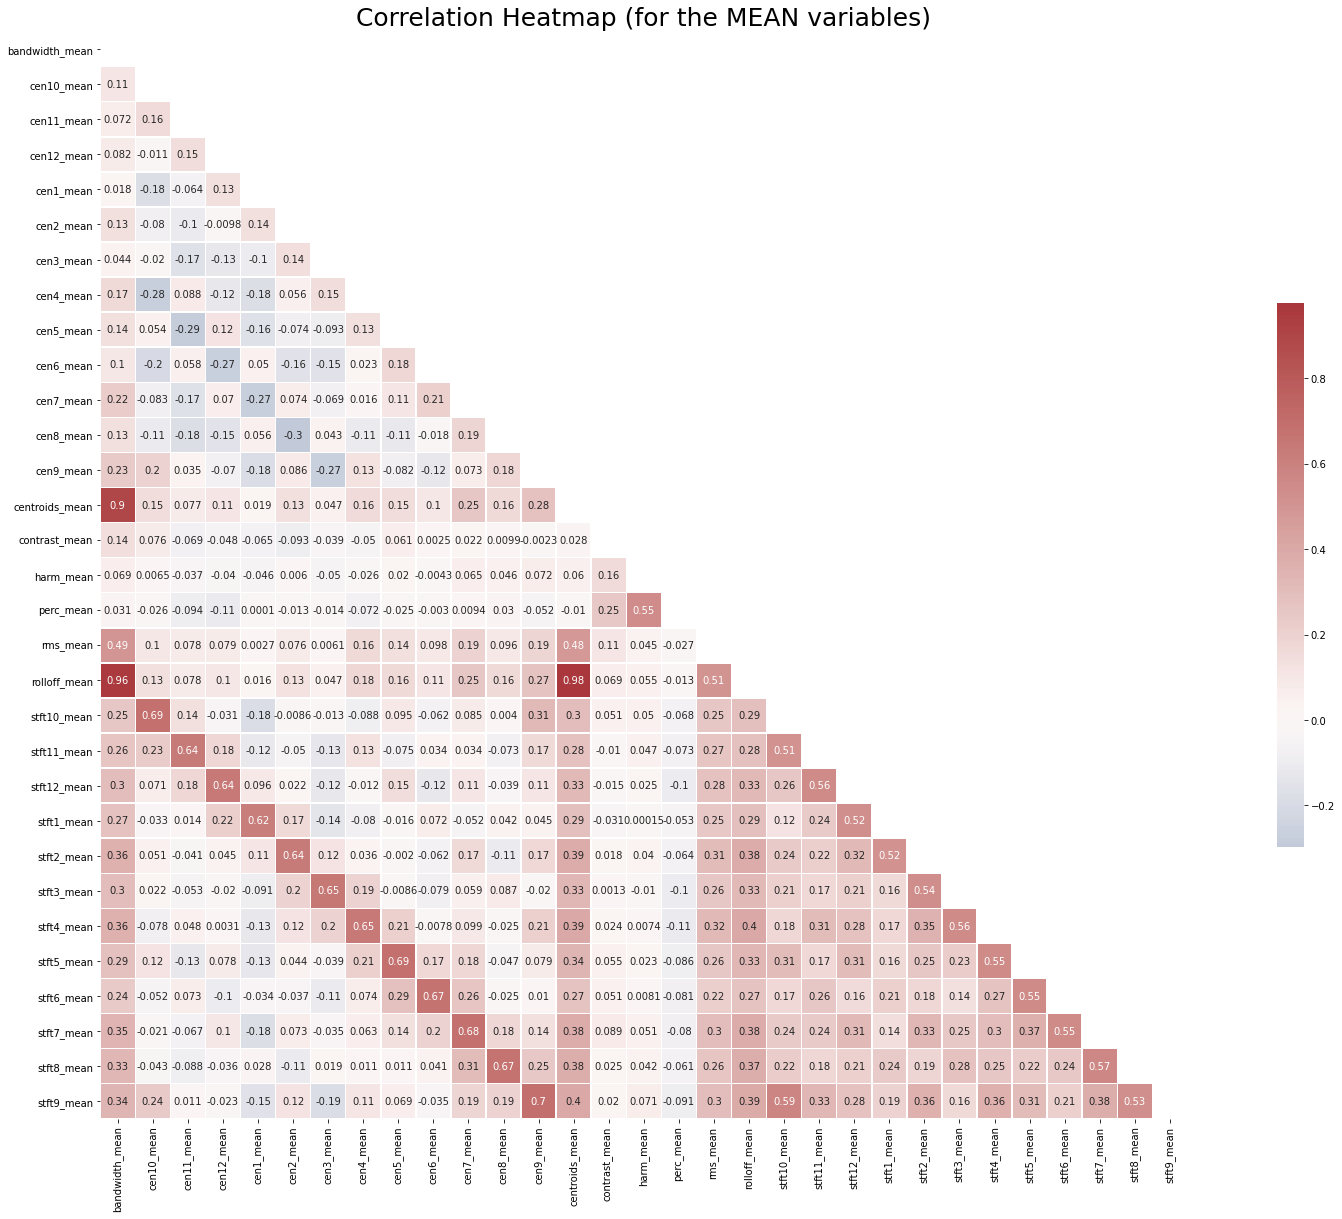

In [13]:
# Computing the Correlation Matrix
spike_cols = [col for col in df_out.columns if 'mean' in col]
corr = df_out[spike_cols].corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(32, 20))

# Generate a custom diverging colormap
# cmap = sns.diverging_palette(0, 25, as_cmap=True, s=90, l=45, n=5)
cmap = sns.color_palette("vlag", as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, center=0, annot=True,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

plt.title('Correlation Heatmap (for the MEAN variables)', fontsize=25)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
_  = plt.show


In [14]:
corr.applymap(lambda x: x if x > .25 and x != 1 else '')

bandwidth_mean cen10_mean cen11_mean cen12_mean cen1_mean  \
bandwidth_mean                                                             
cen10_mean                                                                 
cen11_mean                                                                 
cen12_mean                                                                 
cen1_mean                                                                  
cen2_mean                                                                  
cen3_mean                                                                  
cen4_mean                                                                  
cen5_mean                                                                  
cen6_mean                                                                  
cen7_mean                                                                  
cen8_mean                                                                  
cen9_mean                                                                  
centroids_mean       0.898094                                              
contrast_mean                                                              
harm_mean                                                                  
perc_mean                                                                  
rms_mean             0.494169                                              
rolloff_mean         0.955315                                              
stft10_mean          0.251021   0.691758                                   
stft11_mean          0.264589              0.635939                        
stft12_mean          0.301717                         0.639024             
stft1_mean           0.274542                                   0.621008   
stft2_mean            0.35911                                              
stft3_mean           0.302042                                              
stft4_mean           0.360705                                              
stft5_mean           0.288918                                              
stft6_mean                                                                 
stft7_mean           0.347548                                              
stft8_mean           0.331224                                              
stft9_mean           0.342915                                              

               cen2_mean cen3_mean cen4_mean cen5_mean cen6_mean  ...  \
bandwidth_mean                                                    ...   
cen10_mean                                                        ...   
cen11_mean                                                        ...   
cen12_mean                                                        ...   
cen1_mean                                                         ...   
cen2_mean                                                         ...   
cen3_mean                                                         ...   
cen4_mean                                                         ...   
cen5_mean                                                         ...   
cen6_mean                                                         ...   
cen7_mean                                                         ...   
cen8_mean                                                         ...   
cen9_mean                                                         ...   
centroids_mean                                                    ...   
contrast_mean                                                     ...   
harm_mean                                                         ...   
perc_mean                                                         ...   
rms_mean                                                          ...   
rolloff_mean                                                      ...   
stft10_mean                                                       ...   
stft11_mean                                      

In [15]:
plotly.express.box(
    x="genre", 
    y="contrast_mean", 
    data_frame=df_out, 
    color="genre", 
    title="contrast_mean by genre"
)




In [16]:
plotly.express.box(
    x="genre", 
    y="harm_mean", 
    data_frame=df_out, 
    color="genre", 
    title="harm_mean by genre"
)

In [17]:
for

In [18]:
from sklearn.decomposition import PCA
from sklearn import preprocessing

y = df_out['genre']
X = df_out.drop(columns=['genre', 'filename'])
#### NORMALIZE X ####
cols = X.columns
min_max_scaler = preprocessing.MinMaxScaler()
np_scaled = min_max_scaler.fit_transform(X)
X_pca = pd.DataFrame(np_scaled, columns=cols)

#### PCA 2 COMPONENTS ####

pca = PCA(n_components=3)
principalComponents = pca.fit_transform(X_pca)
principalDf = pd.DataFrame(
    data=principalComponents, 
    columns=['PC1', 'PC2', 'PC3']
)
# concatenate with target genre
finalDf = pd.concat([principalDf, y], axis=1)
print(pca.explained_variance_ratio_)


[0.18267113 0.06410285 0.05733737]


In [19]:
plotly.express.scatter_3d(
    x="PC1",
    y="PC2",
    z="PC3",
    data_frame=finalDf,
    color="genre",
    opacity=0.7,
    title="Principal Components Analysis (3 components)",
    height=800,
    width=800
)
